## McDonalds Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df =pd.read_csv("McDonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


To check if there is any null value in our dataset

In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Hence there are no null values in the dataset

In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
#Convert Categorical data to Numerical Data
df["yummy"]= df["yummy"].replace({'Yes':1, 'No':0})
df["convenient"] = df["convenient"].replace({'Yes':1, 'No':0})
df["spicy"] = df["spicy"].replace({'Yes':1, 'No':0})
df["fattening"] = df["fattening"].replace({'Yes':1, 'No':0})
df["greasy"] = df["greasy"].replace({'Yes':1, 'No':0})
df["fast"] = df["fast"].replace({'Yes':1, 'No':0})
df["cheap"] = df["cheap"].replace({'Yes':1, 'No':0})
df["tasty"] = df["tasty"].replace({'Yes':1, 'No':0})
df["expensive"] = df["expensive"].replace({'Yes':1, 'No':0})
df["healthy"] = df["healthy"].replace({'Yes':1, 'No':0})
df["disgusting"] = df["disgusting"].replace({'Yes':1, 'No':0})

In [9]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [10]:
df1 = df.iloc[:,0:11]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [12]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


## Data Visualization

<AxesSubplot:>

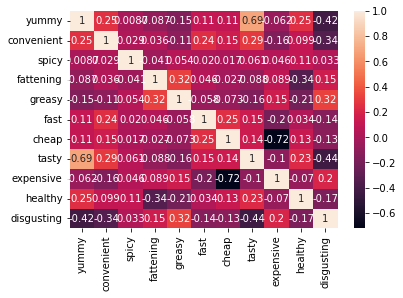

In [13]:
sns.heatmap(df1.corr(), annot=True)

## Principal Component Analysis

In [14]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scaled_df = scalar.fit_transform(df1)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:xlabel='PCA2', ylabel='PCA3'>

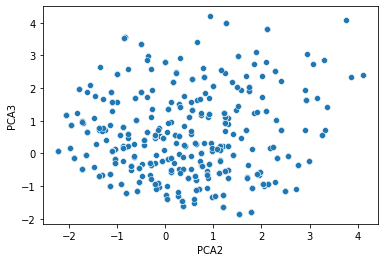

In [16]:
# Visualization PCA2 and PCA3
sns.scatterplot(data=pca_df, x='PCA2', y='PCA3')

## Extracting Segments

In [17]:
#Using K-Means
from sklearn.cluster import KMeans

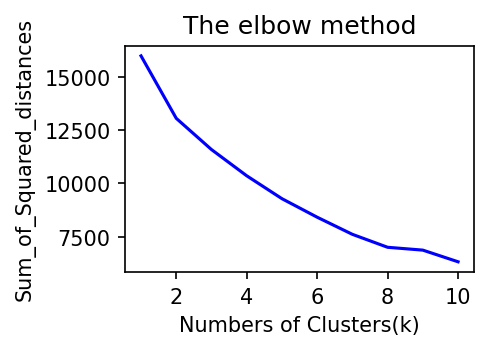

In [20]:
Sum_of_Squared_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(scaled_df)
    Sum_of_Squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(3,2), dpi=150)
plt.plot(range(1, 11), Sum_of_Squared_distances, 'b-')
plt.title('The elbow method')
plt.xlabel('Numbers of Clusters(k)')
plt.ylabel('Sum_of_Squared_distances')
plt.show()
     

In [33]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [34]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,3
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,1
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,1
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,0
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,3


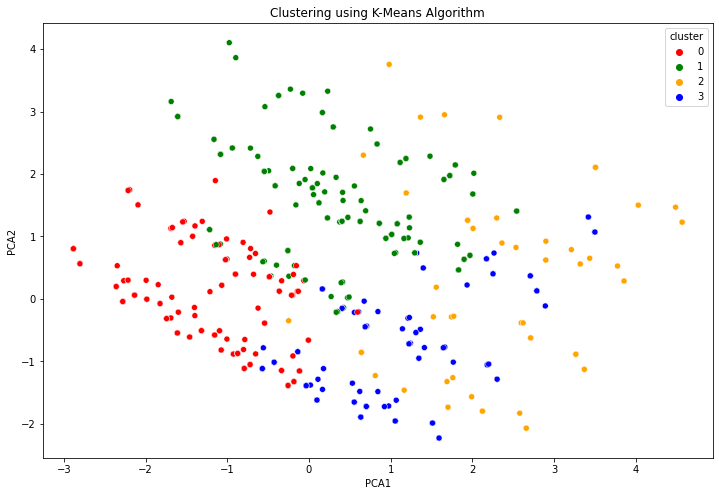

In [35]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','orange','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [36]:
#Creating a target column cluster for storing the cluster segment
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()
     

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,3
4,0,1,0,1,1,1,1,0,0,1,0,0
